# 01 — Data Understanding & Audit

## Objective
- Load the dataset reliably
- Validate schema (shape, dtypes, missingness)
- Check target distribution (attrition rate)
- Identify early data quality issues that may affect modeling

In [16]:
# imports and settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 120)

In [17]:
df = pd.read_csv("../data/raw/hr_employee_attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [18]:
df.shape

(1470, 35)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [20]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Data Schema & Types - Initial Observations

- The dataset contains **1,470 observations** and **35 features**, with **no missing values** across all columns.
- There are **26 numerical (int64)** features and **9 categorical (object)** features.
- The target variable `Attrition` is currently stored as an object and will need to be encoded for modeling.
- Several numerical features appear to be **ordinal or categorical in nature** (e.g., `Education`, `JobLevel`, `EnvironmentSatisfaction`) and should be treated accordingly during preprocessing.
- At this stage, the dataset shows **no immediate issues with missing data**, allowing us to focus on feature relevance and encoding strategies rather than imputation.

In [21]:
df.nunique().sort_values()

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

## Unique Values Audit - What to Drop Early

- The following features have **only one unique value** across all 1,470 rows, meaning they contain **no predictive information** and should be removed before modeling:
  - `Over18` (constant)
  - `StandardHours` (constant)
  - `EmployeeCount` (constant)

- `EmployeeNumber` has **1,470 unique values** (an identifier). It should be excluded from modeling to avoid introducing noise and to keep the model generalizable.

In [22]:
drop_cols = ["Over18", "StandardHours", "EmployeeCount", "EmployeeNumber"]
df_clean = df.drop(columns=drop_cols)

df_clean.shape, df.shape

((1470, 31), (1470, 35))

## Column Pruning - Removing Non-Informative Features

We removed 4 columns before analysis/modeling:
- `Over18`, `StandardHours`, `EmployeeCount`: **constant** features (1 unique value) -> no predictive signal.
- `EmployeeNumber`: **identifier** (unique per employee) -> not a behavioral/HR attribute and may introduce noise.

Result: dataset reduced from **35 → 31 features** while keeping all **1,470 rows** intact.

In [23]:
target_counts = df_clean["Attrition"].value_counts()
target_pct = (df_clean["Attrition"].value_counts(normalize=True) * 100).round(2)

target_counts, target_pct

(Attrition
 No     1233
 Yes     237
 Name: count, dtype: int64,
 Attrition
 No     83.88
 Yes    16.12
 Name: proportion, dtype: float64)

## Target Distribution (Attrition)

- Attrition is imbalanced:
  - No: 1233 employees (83.88%)
  - Yes: 237 employees (16.12%)

Implications:
- Accuracy alone can be misleading (a naive model predicting "No" for everyone would achieve ~83.9% accuracy).
- We will use stratified train/test splitting and evaluate models with metrics that reflect minority-class performance (e.g., recall, precision, F1, ROC-AUC).

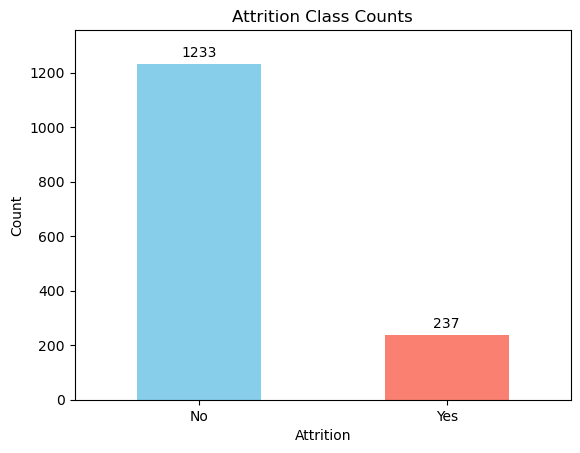

In [24]:
ax = df_clean["Attrition"].value_counts().plot(kind="bar", color=["skyblue", "salmon"])
ax.set_title("Attrition Class Counts")
ax.set_xlabel("Attrition")
ax.set_ylabel("Count")
plt.xticks(rotation=0)
ax.bar_label(ax.containers[0], padding=3)
plt.ylim(0, df_clean["Attrition"].value_counts().max() * 1.1)
plt.show()

In [ ]:
os.makedirs("../data/interim", exist_ok=True)

df_clean.to_csv("../data/interim/hr_employee_attrition_audit_clean.csv", index=False)

## Audit Output

The cleaned dataset after structural audit has been saved to:

data/interim/hr_employee_attrition_audit_clean.csv

This dataset will be used as the input source for:
- Exploratory Data Analysis (02_eda.ipynb)
- Feature engineering
- Modeling and evaluation
- Streamlit application